# 2. Vizualizace dat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("CARS_1.csv")
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             203 non-null    object 
 1   reviews_count        203 non-null    int64  
 2   fuel_type            203 non-null    object 
 3   engine_displacement  203 non-null    int64  
 4   no_cylinder          203 non-null    int64  
 5   seating_capacity     202 non-null    float64
 6   transmission_type    203 non-null    object 
 7   fuel_tank_capacity   203 non-null    float64
 8   body_type            203 non-null    object 
 9   rating               203 non-null    float64
 10  starting_price       203 non-null    int64  
 11  ending_price         203 non-null    int64  
 12  max_torque_nm        203 non-null    float64
 13  max_torque_rpm       203 non-null    int64  
 14  max_power_bhp        203 non-null    float64
 15  max_power_rp         203 non-null    int

## Průměrný rating podle typu paliva

<BarContainer object of 4 artists>

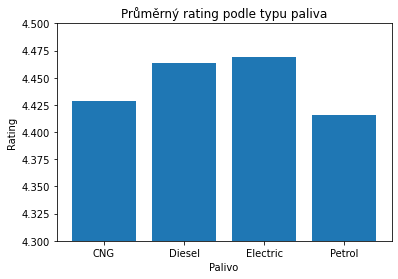

In [4]:
gb_fuel_type = df.groupby("fuel_type")
fuel_type_rating_mean = gb_fuel_type["rating"].mean()

fig, ax = plt.subplots()
ax.set(ylim=[4.3, 4.5])
plt.title("Průměrný rating podle typu paliva")
plt.xlabel("Palivo")
plt.ylabel("Rating")
plt.bar(fuel_type_rating_mean.index, fuel_type_rating_mean)

### Rozdělení podle typu paliva a průměrný rating v 50 nejsilnějších autech

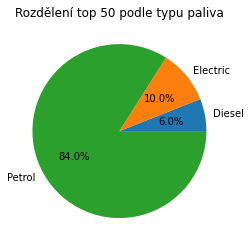

<BarContainer object of 3 artists>

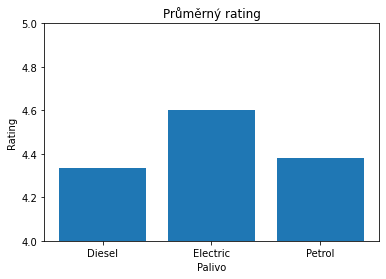

In [5]:
top_power = df.sort_values("max_power_bhp", ascending=False).head(50)
gb_fuel_type = top_power.groupby("fuel_type")
plt.title("Rozdělení top 50 podle typu paliva")
plt.pie(gb_fuel_type["car_name"].count(), labels=gb_fuel_type["car_name"].count().keys(), autopct="%1.1f%%")
plt.show()
fuel_type_rating_mean = gb_fuel_type["rating"].mean()

fig, ax = plt.subplots()
ax.set(ylim=[4, 5])
plt.title("Průměrný rating")
plt.xlabel("Palivo")
plt.ylabel("Rating")
plt.bar(fuel_type_rating_mean.index, fuel_type_rating_mean)
#fuel_type_rating_mean = gb_fuel_type["rating"].mean()

#plt.bar(fuel_type_rating_mean.index, fuel_type_rating_mean, log=True)

## Korelační mapa

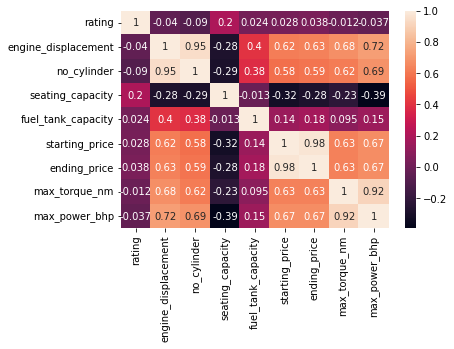

In [6]:
import seaborn as sns
corr = df[[
      'rating',
      'engine_displacement',
      'no_cylinder', 
      'seating_capacity',
      'fuel_tank_capacity',
      'starting_price',
      'ending_price',
      'max_torque_nm',
      'max_power_bhp',
    ]].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)


<Figure size 1080x720 with 0 Axes>

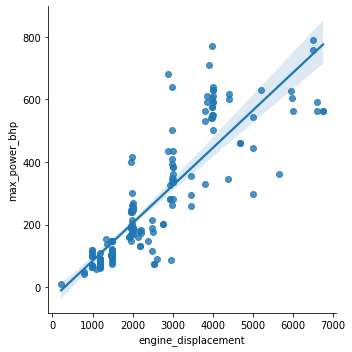

In [7]:
plt.figure(figsize=(15, 10))
sns.lmplot(x="engine_displacement", y="max_power_bhp", data=df[df["fuel_type"] != "Electric"]);

Přidání sloupce výrobce auta

In [8]:
car_name_splitted = df["car_name"].str.split(expand=True)
df["manufacturer"] = car_name_splitted[0]

In [9]:
df["bhp_displacement_ratio"] = df.apply(
    lambda row: row["max_power_bhp"] / row["engine_displacement"] if row["engine_displacement"] != 0 else None,
    axis=1     
)
sorted = df.sort_values("bhp_displacement_ratio", ascending=False).dropna()
sorted.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,manufacturer,bhp_displacement_ratio
151,Porsche Panamera,1,Petrol,2894,8,5.0,Automatic,0.0,Wagon,4.5,15800000,27100000,770.0,4500,680.00,6000,Porsche,0.234969
150,Porsche 911,8,Petrol,2981,6,4.0,Automatic,64.0,Coupe,4.5,17300000,31400000,450.0,5000,641.00,6500,Porsche,0.215029
198,Mercedes-Benz AMG A 45 S,35,Petrol,1991,4,5.0,Automatic,0.0,Hatchback,4.5,659000,999000,500.0,5250,415.71,6750,Mercedes-Benz,0.208795
50,Volvo XC90,35,Petrol,1969,4,7.0,Automatic,68.0,Hybrid,4.5,9390000,9665000,640.0,1740,400.00,0,Volvo,0.203149
157,Ferrari SF90 Stradale,8,Petrol,3990,8,2.0,Automatic,68.0,Coupe,4.5,450000,450000,800.0,6000,769.31,7500,Ferrari,0.192810


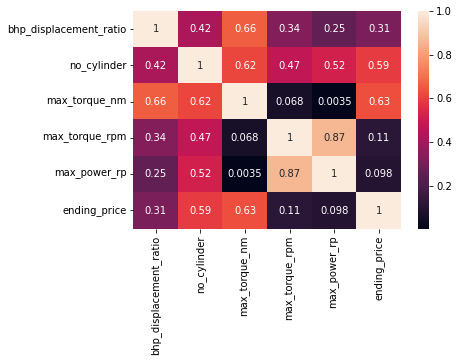

In [16]:
corr = df[[
      'bhp_displacement_ratio',
      'no_cylinder', 
      'max_torque_nm',
      'max_torque_rpm',
      'max_power_rp',
      "ending_price"
    ]].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)


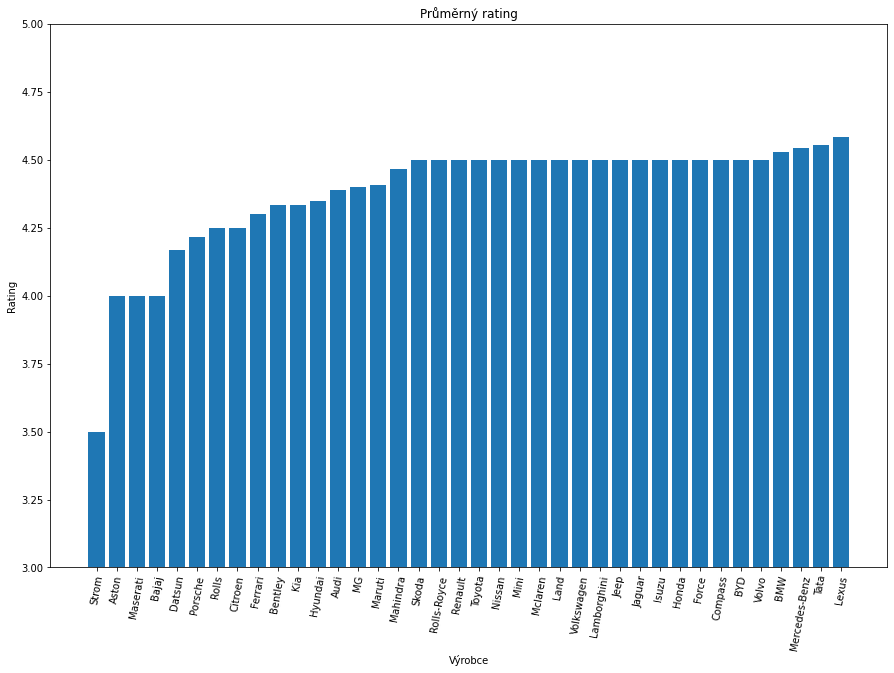

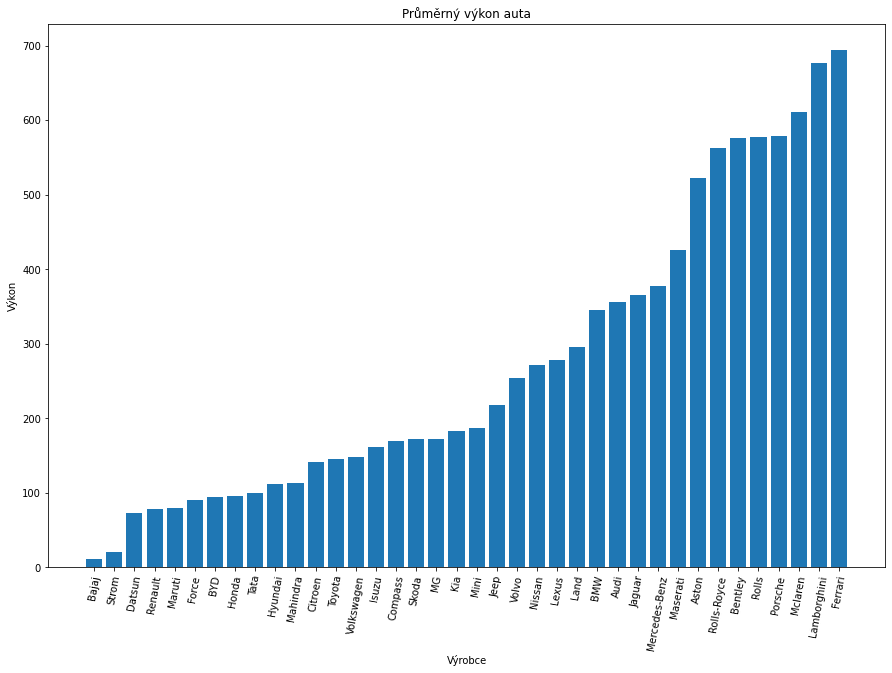

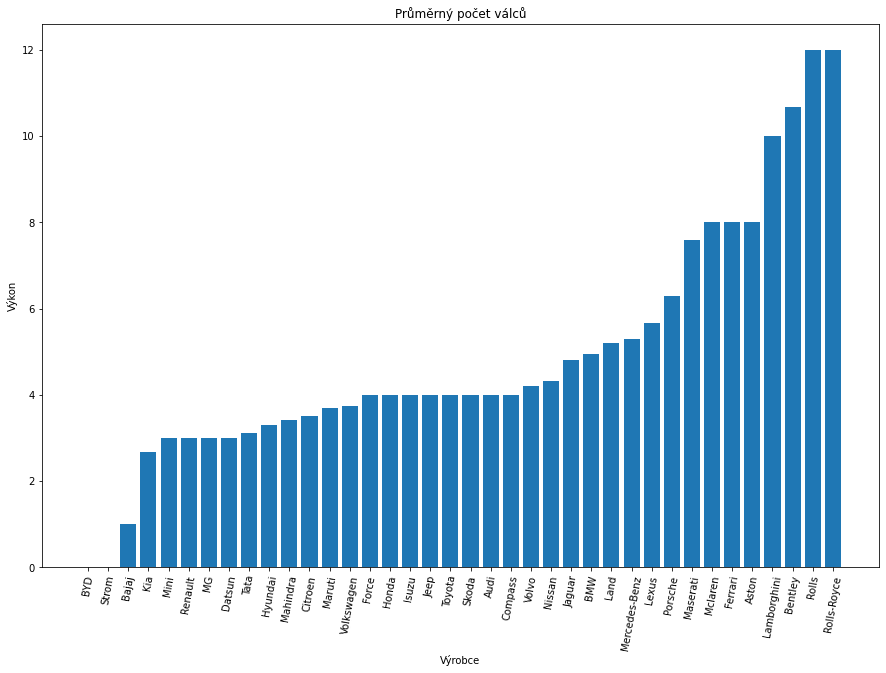

In [10]:
gb_manufacturer = df.groupby("manufacturer")
mean_rating = gb_manufacturer["rating"].mean().sort_values(ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set(ylim=[3, 5])

plt.title("Průměrný rating")
plt.xlabel("Výrobce")
plt.ylabel("Rating")
plt.xticks(range(len(mean_rating.index.values)), mean_rating.index.values, rotation=80)
plt.bar(mean_rating.index, mean_rating)
plt.show()

mean_power = gb_manufacturer["max_power_bhp"].mean().sort_values(ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
#ax.set(ylim=[3, 5])

plt.title("Průměrný výkon auta")
plt.xlabel("Výrobce")
plt.ylabel("Výkon")
plt.xticks(range(len(mean_power.index.values)), mean_power.index.values,
          rotation=80)
plt.bar(mean_power.index, mean_power)
plt.show()

mean_cylinders = gb_manufacturer["no_cylinder"].mean().sort_values(ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
#ax.set(ylim=[3, 5])

plt.title("Průměrný počet válců")
plt.xlabel("Výrobce")
plt.ylabel("Výkon")
plt.xticks(range(len(mean_cylinders.index.values)), mean_cylinders.index.values,
          rotation=80)
plt.bar(mean_cylinders.index, mean_cylinders)
plt.show()

## Nejlepší auta na poměr cena/výkon

In [21]:
df["price"] = df.apply(lambda row: (row["starting_price"] + row["ending_price"]) / 2, axis=1)

In [53]:
df["price/power"] = df.apply(lambda row: row["max_power_bhp"] / row["price"], axis=1)

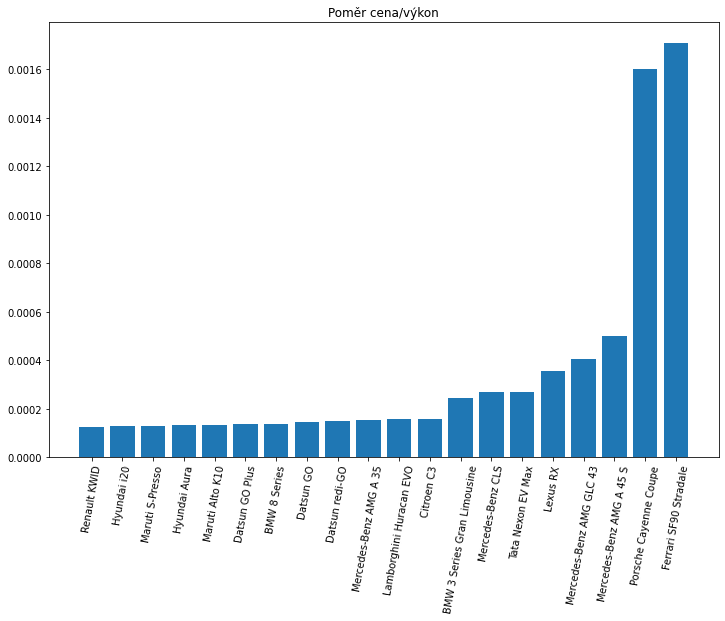

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

top_price_power = df.sort_values("price/power", ascending=True).tail(20)

plt.title("Poměr cena/výkon")
plt.xticks(range(len(top_price_power)), top_price_power["car_name"],
          rotation=80)
plt.bar(top_price_power["car_name"], top_price_power["price/power"])
plt.show()

In [57]:
top_price_power

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,manufacturer,bhp_displacement_ratio,price,price/power
33,Renault KWID,545,Petrol,999,3,5.0,Automatic,28.0,Hatchback,4.5,464000,599000,91.00,4250,67.06,5500,Renault,0.067127,531500.0,0.000126
23,Hyundai i20,432,Petrol,998,3,5.0,Automatic,37.0,Hatchback,3.5,703000,1154000,171.62,4000,118.36,6000,Hyundai,0.118597,928500.0,0.000127
39,Maruti S-Presso,301,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,425000,599000,89.00,3500,65.71,5500,Maruti,0.065842,512000.0,0.000128
45,Hyundai Aura,261,Petrol,998,3,5.0,Manual,37.0,Sedan,4.5,609000,887000,172.00,4000,98.63,6000,Hyundai,0.098828,748000.0,0.000132
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.00,3500,65.71,5500,Maruti,0.065842,491000.0,0.000134
119,Datsun GO Plus,307,Petrol,1198,3,7.0,Automatic,35.0,MUV,4.5,426000,700000,104.00,4400,76.43,6000,Datsun,0.063798,563000.0,0.000136
164,BMW 8 Series,3,Petrol,4395,8,4.0,Automatic,68.0,Coupe,4.5,4200000,4600000,750.00,5600,600.00,6000,BMW,0.136519,4400000.0,0.000136
109,Datsun GO,312,Petrol,1198,3,5.0,Automatic,35.0,Hatchback,4.5,403000,651000,104.00,4400,76.43,6000,Datsun,0.063798,527000.0,0.000145
101,Datsun redi-GO,67,Petrol,999,3,5.0,Automatic,28.0,Hatchback,3.5,398000,496000,91.00,4250,67.05,5550,Datsun,0.067117,447000.0,0.000150
189,Mercedes-Benz AMG A 35,21,Petrol,1991,4,5.0,Automatic,51.0,Sedan,4.5,1989000,1989000,400.00,4000,301.73,5800,Mercedes-Benz,0.151547,1989000.0,0.000152
